<a href="https://colab.research.google.com/github/Sanim27/DeepL_from_scratch/blob/main/1_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

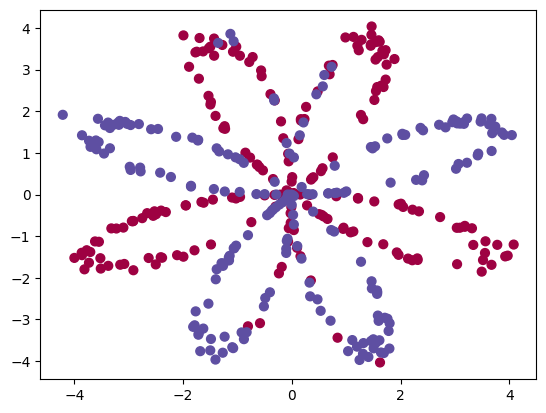

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Import the custom module from the local file
import sys
sys.path.append('/content')  # Add /content to the system path
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

# Ensure that the results are consistent
np.random.seed(1)

# Load the dataset
X, Y = load_planar_dataset()

# Plot the data to ensure it loaded correctly
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [3]:
print(X.shape)

(2, 400)


In [4]:
print(Y.shape)

(1, 400)


In [5]:
m=X.shape[1]

Number of training examples:

In [6]:
print(m)

400


Number of features of X=2

Lets see how the logistic regression does with classifying by using sklearn first

In [7]:
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [8]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<ipython-input-9-df7c6bdb6ec1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


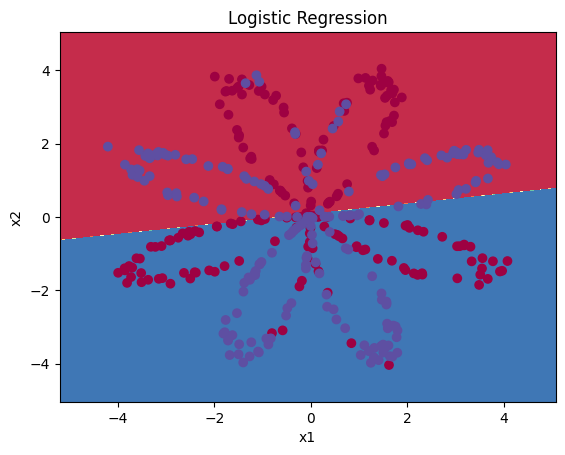

In [9]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [10]:
def layer_sizes(X, Y):
  n_x=X.shape[0]
  n_h=4
  n_y=Y.shape[0]
  return n_x,n_h,n_y

In [28]:
def initialize_parameters(n_x,n_h,n_y):
  W1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  W2 = np.random.randn(n_y, n_h)
  b2=np.zeros((n_y,1))
  parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
  return parameters

In [12]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [15]:
# for testing sigmoid
z=np.random.rand(4,400)
print(z)
print(z.shape)
print(sigmoid(z))
print(sigmoid(z).shape)

[[0.28395089 0.08595223 0.52178121 ... 0.52908721 0.79348467 0.03587915]
 [0.19135888 0.97745556 0.96079731 ... 0.70755995 0.88798009 0.09577603]
 [0.81577058 0.27801633 0.59228739 ... 0.83626722 0.32693562 0.90234464]
 [0.7718023  0.65808298 0.89980307 ... 0.67716682 0.55076456 0.04396266]]
(4, 400)
[[0.57051457 0.52147484 0.62756418 ... 0.62927019 0.68857907 0.50896883]
 [0.54769427 0.72660305 0.72328141 ... 0.66986177 0.70847316 0.52392572]
 [0.69333782 0.56905983 0.64388981 ... 0.69767847 0.58101358 0.71143109]
 [0.68391064 0.65882963 0.71090903 ... 0.66310607 0.63431296 0.5109889 ]]
(4, 400)


In [20]:
def forward_propagation(X,parameters):
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]

  Z1=np.dot(W1,X)+b1
  A1=np.tanh(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=sigmoid(Z2)

  # for backward prop cache is required.
  cache={
      "Z1":Z1,  # (4,400)
      "A1":A1,  # (4,400)
      "Z2":Z2,  # (1,400)
      "A2":A2   # (1,400)
  }
  return A2,cache

In [30]:
def compute_cost(A2,Y):
  m=Y.shape[1]
  logprobs=np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
  cost=-np.sum(logprobs)/m
  cost=float(np.squeeze(cost))
  return cost

In [35]:
def back_prop(X,Y,parameters,cache):
  m=X.shape[1]
  W1=parameters["W1"]
  W2=parameters["W2"]
  A1=cache["A1"]
  A2=cache["A2"]



  #calculating gradients
  dZ2=A2-Y
  dW2=1/m*(np.dot(dZ2,A1.T))
  db2=1/m*(np.sum(dZ2,axis=1,keepdims=True))

  dZ1=np.multiply(np.dot(W2.T,dZ2),1-np.power(A1,2))
  dW1=1/m*(np.dot(dZ1,X.T))
  db1=1/m*(np.sum(dZ1,axis=1,keepdims=True))


  #storing gradients.
  grads={
      "dW1":dW1,
      "db1":db1,
      "dW2":dW2,
      "db2":db2
  }
  return grads

In [32]:
def update_parameters(parameters,grads,learning_rate):
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]

  dW1=grads["dW1"]
  db1=grads["db1"]
  dW2=grads["dW2"]
  db2=grads["db2"]

  W1=W1-learning_rate*dW1
  b1=b1-learning_rate*db1
  W2=W2-learning_rate*dW2
  b2=b2-learning_rate*db2

  parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
  return parameters

In [25]:
def nn_model(X,Y,n_h,learning_rate,num_iterations=10000,print_cost=False):
  n_x=layer_sizes(X,Y)[0]
  n_y=layer_sizes(X,Y)[2]


  parameters=initialize_parameters(n_x,n_h,n_y)
  # W1=parameters["W1"]
  # b1=parameters["b1"]
  # W2=parameters["W2"]
  # b2=parameters["b2"]

  for i in range(num_iterations):
    A2,cache=forward_propagation(X,parameters)
    cost=compute_cost(A2,Y)
    grads=back_prop(X,Y,parameters,cache)
    parameters=update_parameters(parameters,grads,learning_rate)
    if print_cost and i%1000==0:
      print(f"Cost after iteration {i} : {cost}")

  return parameters

Now using model to predict . So we must build a predict function.

In [26]:
def predict(parameters,X):
  A2,cache=forward_propagation(X,parameters)
  predictions=(A2>0.5)*1.0
  return predictions

In [36]:
parameters=nn_model(X,Y,n_h=4,learning_rate=1.2,num_iterations=10000,print_cost=True)

Cost after iteration 0 : 0.6951928667765405
Cost after iteration 1000 : 0.2807347980593219
Cost after iteration 2000 : 0.26879813617535186
Cost after iteration 3000 : 0.26159192501163625
Cost after iteration 4000 : 0.23601920922723246
Cost after iteration 5000 : 0.2253192906164295
Cost after iteration 6000 : 0.22124677468069723
Cost after iteration 7000 : 0.21863473023397004
Cost after iteration 8000 : 0.21666445819040908
Cost after iteration 9000 : 0.2150773400031537


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

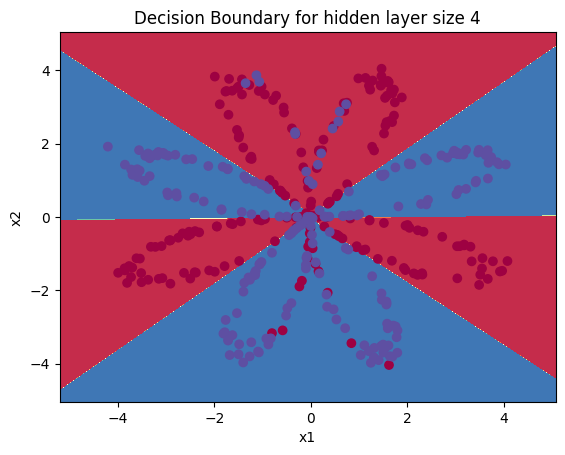

In [37]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [39]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


<ipython-input-39-4dde0b1bf9a2>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


### Testing out with other numbers of hidden units

<ipython-input-40-0e435e426256>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 92.0 %
Accuracy for 20 hidden units: 92.25 %
Accuracy for 50 hidden units: 94.25 %


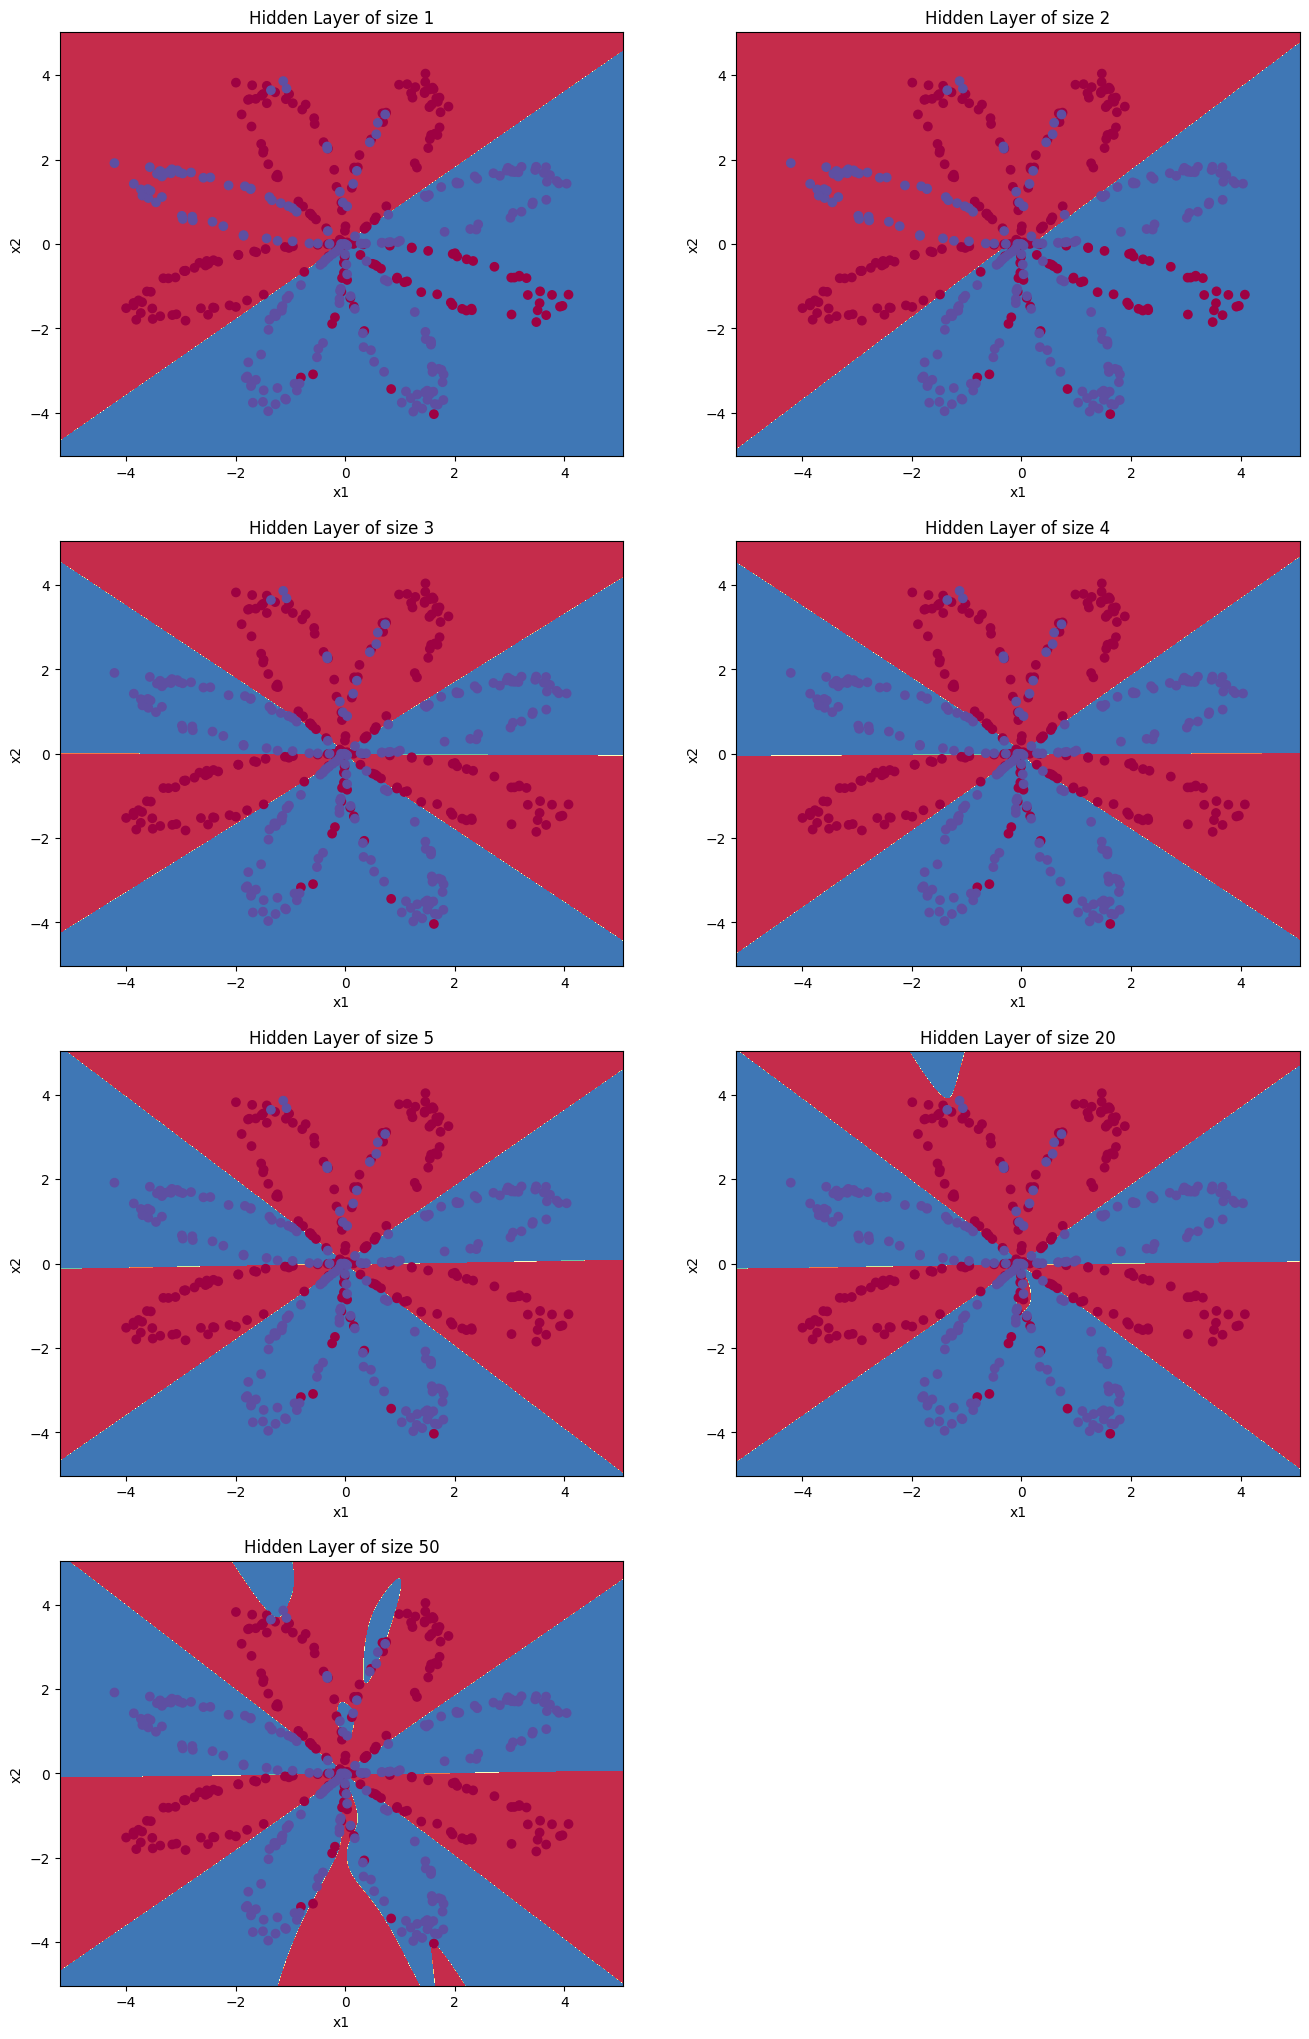

In [40]:
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
plt.figure(figsize=(16, 32))
for i, n_h in enumerate(hidden_layer_sizes):
  plt.subplot(5, 2, i+1)
  plt.title('Hidden Layer of size %d' % n_h)
  parameters = nn_model(X,Y,n_h, learning_rate = 0.5, num_iterations = 20000)
  plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
  predictions = predict(parameters, X)
  accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
  print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

For n=50 the model has started to overfit to the training set

### Thats all for this notebook.